In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_csv('Position_Salaries.csv')
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
print(df.describe())
print(df.info())

          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


In [11]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [13]:
X = df.iloc[:,1:2].values.astype(float)
y = df.iloc[:,2:3].values.astype(float)
print(X)
print(y)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [33]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Visualization

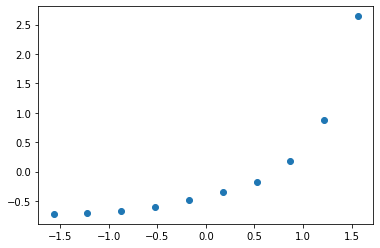

In [34]:
plt.scatter(X, y)
plt.show()

In [35]:
model = SVR(kernel = 'rbf')
model.fit(X,y)

C:\Users\Irfan Ali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

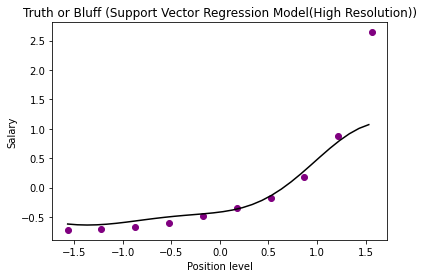

In [36]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "purple")
plt.plot(X_grid, model.predict(X_grid), color = "black")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [37]:
print(X_grid)

[[-1.5666989]
 [-1.4666989]
 [-1.3666989]
 [-1.2666989]
 [-1.1666989]
 [-1.0666989]
 [-0.9666989]
 [-0.8666989]
 [-0.7666989]
 [-0.6666989]
 [-0.5666989]
 [-0.4666989]
 [-0.3666989]
 [-0.2666989]
 [-0.1666989]
 [-0.0666989]
 [ 0.0333011]
 [ 0.1333011]
 [ 0.2333011]
 [ 0.3333011]
 [ 0.4333011]
 [ 0.5333011]
 [ 0.6333011]
 [ 0.7333011]
 [ 0.8333011]
 [ 0.9333011]
 [ 1.0333011]
 [ 1.1333011]
 [ 1.2333011]
 [ 1.3333011]
 [ 1.4333011]
 [ 1.5333011]]


In [38]:
y_pred = model.predict(X)
y_pred

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

# Comparing it with Polynomial Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures(degree=3)

In [40]:
from sklearn.linear_model import LinearRegression
polymodel = LinearRegression()
polymodel.fit(X_poly,y)

LinearRegression()

Text(0, 0.5, 'Brain Weight')

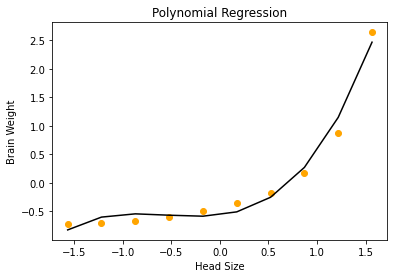

In [41]:
plt.scatter(X,y, color = 'orange')
plt.plot(X,polymodel.predict(poly.fit_transform(X)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')